In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
wallets = pd.read_csv("wallets_cleaned.csv")

In [184]:
wallets["rank"] = wallets.index + 1

In [185]:
allocations = [0.22, 0.48, 0.2, 0]
slopes = [0.0125, 0.002, 0.00105, 0]
counts = [96, 852, 4052, np.inf]

In [186]:
[0, sum(counts[0:1]), sum(counts[0:2]), sum(counts[0:2], len(wallets))],
cum_counts = [0] + [sum(counts[:i]) for i in range(1, len(counts) + 1)]
weights = [(((1 + slopes[i]) ** counts[i]) - 1) / slopes[i] if slopes[i] != 0 else 1 for i in range(len(slopes))]

In [187]:
wallets["tier"] = pd.cut(wallets["rank"], bins=cum_counts, labels=range(1, len(counts) + 1))

In [188]:
wallets["allocation"] = wallets.apply(lambda row: (1 + slopes[row["tier"] - 1]) ** (cum_counts[row["tier"]] - row["rank"]) * allocations[row["tier"] - 1] / weights[row["tier"] - 1], axis=1)

In [189]:
total_bridged = wallets["JOE_BRIDGED"].sum()
wallets["ratio"] = wallets["allocation"] / (wallets["JOE_BRIDGED"] / total_bridged)

/Users/louismyself/Library/Caches/pypoetry/virtualenvs/notebooks-dCeGiXWB-py3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


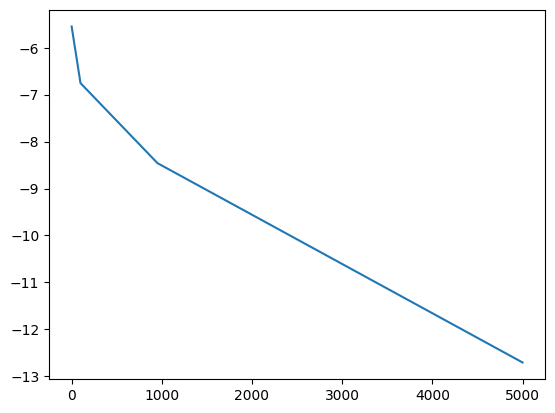

In [190]:
ranks = wallets["rank"]
allocations = np.log(wallets["allocation"])

plt.plot(ranks, allocations)
plt.show()

/Users/louismyself/Library/Caches/pypoetry/virtualenvs/notebooks-dCeGiXWB-py3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


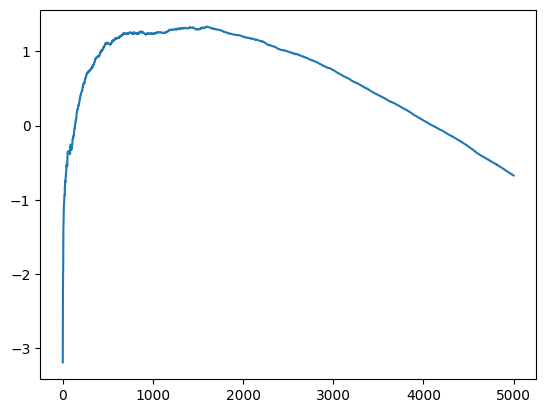

In [191]:
ranks = wallets["rank"]
ratios = np.log(wallets["ratio"])

plt.plot(ranks, ratios)

In [195]:
for tier in range(1, len(counts)):
    print(f"Tier {tier}: ({cum_counts[tier-1]}, {cum_counts[tier] - 1})")
    print(f"Allocation: {wallets['allocation'].loc[cum_counts[tier-1]]}, {wallets['allocation'].loc[cum_counts[tier] - 1]}")

Tier 1: (0, 95)
Allocation: 0.003899248561195152, 0.0011979891682100913
Tier 2: (96, 947)
Allocation: 0.0011716299740831932, 0.00021397323403135978
Tier 3: (948, 4999)
Allocation: 0.00021280809639251814, 3.031544893730306e-06
